In [556]:
import pandas as pd

df = pd.read_csv('vehicles_us.csv')

print(df)

df.info()

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

Purpose of the project: To develop and deploy a web application about car sales advertisements to a cloud service so that it is accessible to the public.

The first step I did is to import the necessary library and open the data file.
The following steps will be dedicated to process the data, clean missing values, dupplicates and set the data frame for further analysis.

In [557]:
print (df['model_year'].isna().sum())

3619


In [558]:
df['cylinders'].fillna(0)

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


From the above is obvious that there are missing values on some of the columns. Which will be treated separately on the following code lines.
- model_year
- cylinders
- odometer
- paint_color
- is_4wd

In [560]:
print (df['cylinders'].isna().sum())

5260


In [561]:
df['cylinders'].fillna(0)


0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64

In [562]:
print(df['cylinders'].isna().sum())

5260


In [563]:
print(df['cylinders'])

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64


In [564]:
print(df.cylinders)

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64


In [565]:
display(df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [566]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

I am checking that the titles of the columns are clean or need to be clean, in this case the titles are clean.

In [567]:
df[df.model_year.isnull()==True]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [568]:
columns_to_replace = ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']
for col in columns_to_replace:
    df[col] = df[col].fillna('unknown')
    print(df)

       price model_year           model  condition  cylinders fuel  odometer  \
0       9400     2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500    unknown      ford f-150       good        6.0  gas   88705.0   
2       5500     2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500     2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900     2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...        ...             ...        ...        ...  ...       ...   
51520   9249     2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700     2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950     2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455     2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300     2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color 

In [569]:
df.isnull().sum()


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

The missing values on the columns have been cleaned.

In [570]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Length: 51525, dtype: bool

In [571]:
df[df.duplicated()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [572]:
df.duplicated().sum()


0

There are no dupplicate values on the data frame.

In [573]:
df.model.nunique()


100

ON the next steps I am checking for non-obvious dupplicates on some columns, checking if there are variations on same model or brand of car, etc.

In [574]:
df.model.unique()


array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [575]:
sorted(df.model.unique())


['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

In [576]:
df.condition.unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [577]:
df.type.unique()


array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [578]:
df.paint_color.unique()


array(['unknown', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [579]:
df.fuel.unique()


array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [580]:
df.transmission.unique()


array(['automatic', 'manual', 'other'], dtype=object)

From the above steps I can deduce that there are defenitely no dupplicate values and the data frame is cleaned in regards to this factor so I can proceed with the analysys.

In [581]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  object
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  object
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  object
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  object
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 5.1+ MB


In [582]:
print(df.model_year.to_string(index=False))

 2011.0
unknown
 2013.0
 2003.0
 2017.0
 2014.0
 2015.0
 2013.0
 2012.0
 2008.0
 2011.0
 2012.0
 2012.0
 2018.0
 2009.0
 2013.0
 2010.0
 2014.0
 2013.0
 2018.0
unknown
 2007.0
 2004.0
 2004.0
 2009.0
 2017.0
 2014.0
 2015.0
 2012.0
 2010.0
 2009.0
 2017.0
 2015.0
 2011.0
 2008.0
 2015.0
 2013.0
 2005.0
 2015.0
 2009.0
 2017.0
 2017.0
 2013.0
 2008.0
 2004.0
 2001.0
 2015.0
 2008.0
 2014.0
 2006.0
 2006.0
 2012.0
 2011.0
 2012.0
 2017.0
 2017.0
 2006.0
 2012.0
 2004.0
 2006.0
 2005.0
 2013.0
 2017.0
 1966.0
 2017.0
unknown
 2013.0
 2012.0
 2013.0
unknown
 2006.0
 2018.0
unknown
 1994.0
 2008.0
 2005.0
 2010.0
 2012.0
 2019.0
 2012.0
 2014.0
 2000.0
 2014.0
 2008.0
unknown
 2000.0
 2011.0
 2009.0
 2017.0
 2015.0
 2010.0
 2010.0
 2003.0
 2017.0
 2012.0
 2017.0
 2013.0
 2012.0
 2008.0
 2018.0
 2015.0
 2017.0
unknown
 2004.0
 2014.0
 2015.0
 2019.0
 2017.0
 2018.0
 2013.0
 2017.0
 2018.0
 2019.0
 2014.0
unknown
 2018.0
unknown
 2012.0
 2017.0
 2016.0
 2018.0
 2006.0
 2012.0
 2015.0
 2018.0


In [583]:
df['model_year'] = df['model_year'].replace('unknown', 0)
print(df['model_year'])

0        2011.0
1           0.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64


In [584]:
df['model_year'] = df['model_year'].astype(int)
print(df['model_year'])

0        2011
1           0
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64


In [585]:
print(df.odometer.to_string(index=False))


 145000.0
  88705.0
 110000.0
  unknown
  80903.0
  57954.0
  79212.0
 109473.0
 104174.0
 147191.0
 128413.0
 111142.0
 140742.0
  22104.0
 132285.0
  unknown
 130725.0
 100669.0
 128325.0
  31932.0
 147485.0
 154000.0
 180000.0
  unknown
  unknown
  unknown
  79523.0
  39368.0
  57413.0
  unknown
 137273.0
  35721.0
  51848.0
 300000.0
 149799.0
  63037.0
  88042.0
 160000.0
  unknown
 234000.0
  54772.0
  unknown
  unknown
 188000.0
 168821.0
 277564.0
  90302.0
 141098.0
  46000.0
 255390.0
  69698.0
 130323.0
 188963.0
 111871.0
  30339.0
  35807.0
  unknown
 163261.0
  unknown
 186000.0
 146000.0
 137230.0
  53601.0
  51000.0
  17498.0
 108500.0
  unknown
 114773.0
 158786.0
  97510.0
  unknown
  27493.0
  74000.0
    207.0
  unknown
 186021.0
 200412.0
 144273.0
  10899.0
 123262.0
  68607.0
 202752.0
 102878.0
 170000.0
 151223.0
 226111.0
 100680.0
 104482.0
  unknown
  33926.0
  50500.0
 200800.0
 230000.0
  32104.0
 124526.0
 105985.0
  22474.0
  90000.0
 165000.0
  18500.0


In [586]:
df['odometer'] = df['odometer'].replace('unknown', 0)
print(df['odometer'])

0        145000.0
1         88705.0
2        110000.0
3             0.0
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524         0.0
Name: odometer, Length: 51525, dtype: float64


In [587]:
df['odometer'] = df['odometer'].astype(int)
print(df['odometer'])

0        145000
1         88705
2        110000
3             0
4         80903
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524         0
Name: odometer, Length: 51525, dtype: int64


Now we can see above that the columsn have been clean and it shows the same values on all the columns.
In short:
- Missing values for some objects have been replaced by "unkown" values.
- Missing values on cyclinders and odometer have been replaced by zeroes.
- model_year format have been cleaned deleting the trailing zeroes from the year and de decimal.
- odometer columns format have been cleaned deleting the trailing zeroes from the number of km and the decimal.

On the next steps I am going to work on the column 'price' to be able to use it as parameter for the analysis. in order to fo that I will delete the outliers values from the columns and I will keep the columns on some logical range of prices that I can use.

In [588]:
print(df['price'].value_counts()[1])


798


From the above you can see there are 798 rows as outliers with value 1 'price'.

Next I will see what is the minimun and maximum price on the column.

In [589]:
print(df['price'].max())
print(df['price'].min())


375000
1


In [590]:
df.sort_values("price")


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
22900,1,0,dodge charger,excellent,10.0,gas,25146,other,sedan,black,1.0,2018-09-29,60
10873,1,2018,ram 3500,excellent,6.0,gas,3047,automatic,truck,white,1.0,2018-11-22,27
9536,1,2016,dodge charger,excellent,10.0,gas,29406,other,sedan,red,1.0,2018-11-14,27
9537,1,0,ford fusion,excellent,4.0,gas,0,automatic,sedan,blue,1.0,2018-06-18,5
9538,1,2015,chevrolet camaro,excellent,10.0,gas,28926,other,coupe,grey,1.0,2018-10-06,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30634,189000,2014,ford f-150,good,6.0,gas,0,automatic,truck,black,unknown,2018-07-21,42
33434,189000,2014,ford f-150,good,6.0,gas,151248,automatic,truck,black,unknown,2019-02-05,102
27375,189000,2014,ford f-150,good,6.0,gas,151248,automatic,truck,black,unknown,2018-09-25,72
11359,300000,2015,ram 2500,excellent,unknown,diesel,0,automatic,truck,grey,1.0,2018-10-15,39


In [591]:
df = df.drop(df[df['price'] == 1].index)
print(df)


       price  model_year           model  condition cylinders fuel  odometer  \
0       9400        2011          bmw x5       good       6.0  gas    145000   
1      25500           0      ford f-150       good       6.0  gas     88705   
2       5500        2013  hyundai sonata   like new       4.0  gas    110000   
3       1500        2003      ford f-150       fair       8.0  gas         0   
4      14900        2017    chrysler 200  excellent       4.0  gas     80903   
...      ...         ...             ...        ...       ...  ...       ...   
51520   9249        2013   nissan maxima   like new       6.0  gas     88136   
51521   2700        2002     honda civic    salvage       4.0  gas    181500   
51522   3950        2009  hyundai sonata  excellent       4.0  gas    128000   
51523   7455        2013  toyota corolla       good       4.0  gas    139573   
51524   6300        2014   nissan altima       good       4.0  gas         0   

      transmission    type paint_color 

Eventhough I got rid of the outliers with value 1, I can still see there are more, so I will take out all the values below 200 which is a price I can take as minimum for the analysis.

In [592]:
df.sort_values("price")


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
44205,3,2005,jeep liberty,good,6.0,gas,0,automatic,SUV,unknown,1.0,2018-06-19,22
50430,5,2011,toyota sienna,good,6.0,gas,0,automatic,SUV,green,unknown,2018-12-03,5
31263,6,1999,ford f250,good,8.0,gas,173500,automatic,pickup,unknown,1.0,2019-02-07,53
39379,9,2010,subaru forester,good,4.0,gas,119,automatic,SUV,grey,1.0,2019-03-02,12
50971,10,2012,toyota prius,excellent,4.0,hybrid,101000,automatic,hatchback,green,unknown,2019-03-16,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30634,189000,2014,ford f-150,good,6.0,gas,0,automatic,truck,black,unknown,2018-07-21,42
34389,189000,2014,ford f-150,good,6.0,gas,151248,automatic,truck,black,unknown,2019-02-02,28
1668,189000,2014,ford f-150,good,6.0,gas,151248,automatic,truck,unknown,unknown,2019-03-20,21
11359,300000,2015,ram 2500,excellent,unknown,diesel,0,automatic,truck,grey,1.0,2018-10-15,39


In [593]:
df = df.drop(df[df['price'] < 200].index)
print(df)
           

       price  model_year           model  condition cylinders fuel  odometer  \
0       9400        2011          bmw x5       good       6.0  gas    145000   
1      25500           0      ford f-150       good       6.0  gas     88705   
2       5500        2013  hyundai sonata   like new       4.0  gas    110000   
3       1500        2003      ford f-150       fair       8.0  gas         0   
4      14900        2017    chrysler 200  excellent       4.0  gas     80903   
...      ...         ...             ...        ...       ...  ...       ...   
51520   9249        2013   nissan maxima   like new       6.0  gas     88136   
51521   2700        2002     honda civic    salvage       4.0  gas    181500   
51522   3950        2009  hyundai sonata  excellent       4.0  gas    128000   
51523   7455        2013  toyota corolla       good       4.0  gas    139573   
51524   6300        2014   nissan altima       good       4.0  gas         0   

      transmission    type paint_color 

In [594]:
df.sort_values("price")


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
34221,200,2017,hyundai elantra,excellent,4.0,gas,77000,automatic,sedan,red,unknown,2018-05-06,44
14009,200,2018,nissan rogue,like new,unknown,gas,11900,automatic,SUV,silver,1.0,2018-08-12,17
30444,200,2000,nissan maxima,fair,6.0,gas,0,automatic,sedan,white,unknown,2018-11-10,158
22420,200,2001,jeep grand cherokee,fair,8.0,gas,99999,automatic,SUV,red,1.0,2018-05-27,9
34173,200,2015,ford fusion,excellent,4.0,gas,90000,automatic,sedan,white,unknown,2018-12-25,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,189000,2014,ford f-150,good,6.0,gas,151248,automatic,truck,black,unknown,2019-03-02,56
30634,189000,2014,ford f-150,good,6.0,gas,0,automatic,truck,black,unknown,2018-07-21,42
27375,189000,2014,ford f-150,good,6.0,gas,151248,automatic,truck,black,unknown,2018-09-25,72
11359,300000,2015,ram 2500,excellent,unknown,diesel,0,automatic,truck,grey,1.0,2018-10-15,39


Now we have a columns with cars with minimum price 200 to maximum price 375000.

Following you can see a graphical view of the range of prices and another one with percentages of car condition.

In [595]:
df.groupby("condition").size()


condition
excellent    23943
fair          1597
good         20110
like new      4710
new            139
salvage        115
dtype: int64

<BarContainer object of 50614 artists>

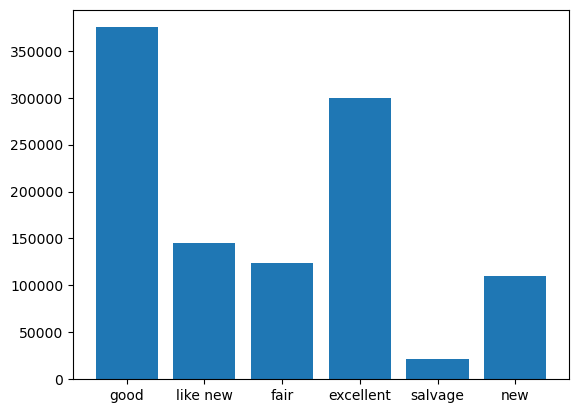

In [596]:
import matplotlib.pyplot as plt
plt.bar(df['condition'], df['price'])

From the above visualization we can see that the condition of the cars doesn't necessarily mean that they are more expensive, i.e, new cars are not the most epensive ones. Most expensive cars are in Good condition. Followed by cars in Excellent condition.

Now I will explore with the model_year column to see if there are any meaning results comparing with prices and condition.

In [597]:
df.groupby("model_year").size()


model_year
0       3560
1908       2
1929       1
1936       1
1948       1
        ... 
2015    3237
2016    2856
2017    2282
2018    1933
2019     330
Length: 69, dtype: int64

In [599]:
column_to_check = 'model_year'
df = df[df[column_to_check] != 0]
print(df['model_year'])


0        2011
2        2013
3        2003
4        2017
5        2014
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 47054, dtype: int64


In [601]:
df_sorted = df.sort_values(by='model_year', ascending=True)
print(df_sorted)


       price  model_year                         model  condition cylinders  \
33906  12995        1908                     gmc yukon       good       8.0   
33907  12995        1908             cadillac escalade  excellent       8.0   
45694  18000        1929                    ford f-150       good       8.0   
34713   5000        1936                    ford f-150  excellent       6.0   
22595  21000        1948              chevrolet impala   like new       8.0   
...      ...         ...                           ...        ...       ...   
106    21500        2019   nissan frontier crew cab sv       good       6.0   
78     23800        2019   nissan frontier crew cab sv       good       6.0   
8157   31998        2019                 jeep wrangler  excellent       6.0   
8122   24200        2019  chevrolet camaro lt coupe 2d       good       6.0   
47786  34500        2019                 ford explorer  excellent       6.0   

      fuel  odometer transmission    type paint_col

<BarContainer object of 47054 artists>

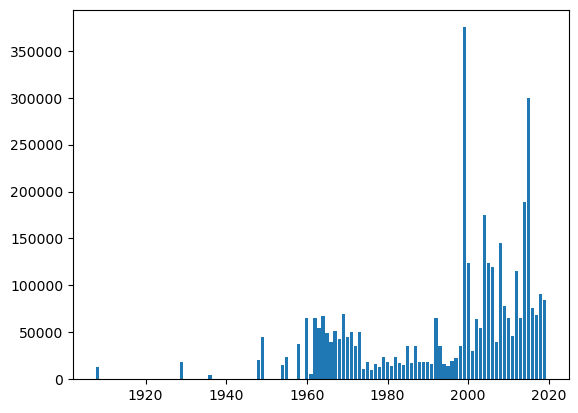

In [602]:
import matplotlib.pyplot as plt
plt.bar(df['model_year'], df['price'])


From the visualization I can see the presence of some outliers. Models after 1960 are the models I can use to start the analysis. I will filter the model_year to keep only the models from 1960 and later.

In [603]:
year_column = 'model_year'
df_filtered = df[df['model_year'] >= 1960]
print(df_filtered)


       price  model_year           model  condition cylinders fuel  odometer  \
0       9400        2011          bmw x5       good       6.0  gas    145000   
2       5500        2013  hyundai sonata   like new       4.0  gas    110000   
3       1500        2003      ford f-150       fair       8.0  gas         0   
4      14900        2017    chrysler 200  excellent       4.0  gas     80903   
5      14990        2014    chrysler 300  excellent       6.0  gas     57954   
...      ...         ...             ...        ...       ...  ...       ...   
51520   9249        2013   nissan maxima   like new       6.0  gas     88136   
51521   2700        2002     honda civic    salvage       4.0  gas    181500   
51522   3950        2009  hyundai sonata  excellent       4.0  gas    128000   
51523   7455        2013  toyota corolla       good       4.0  gas    139573   
51524   6300        2014   nissan altima       good       4.0  gas         0   

      transmission    type paint_color 

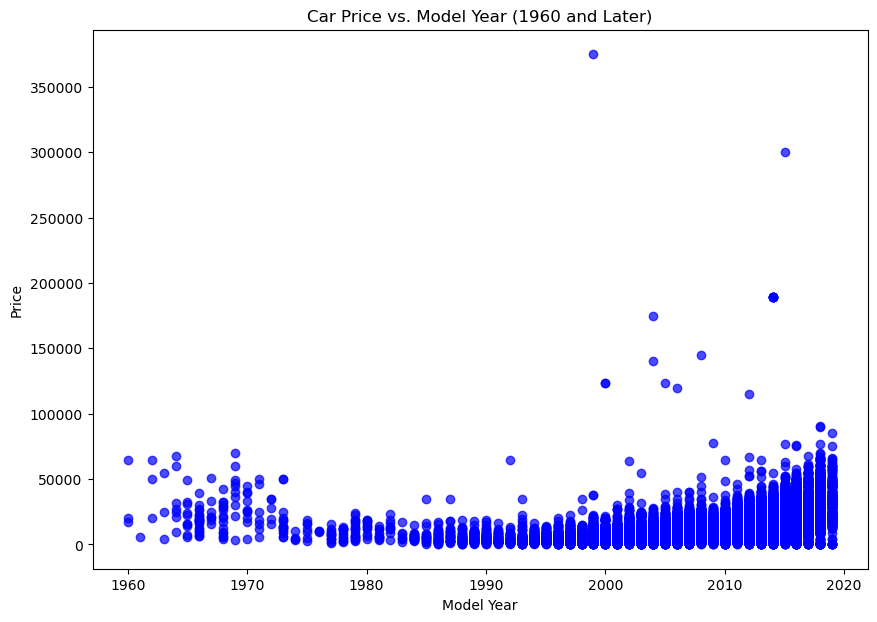

In [616]:
import matplotlib.pyplot as plt
df_filtered = df[df['model_year'] >= 1960]
plt.figure(figsize=(10, 7))
plt.scatter(df_filtered['model_year'], df_filtered['price'], color='blue', alpha=0.7)
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.title('Car Price vs. Model Year (1960 and Later)')
plt.show()


From the visualization we can see that the tendency for the price compared to the model year is positive, it increases as the model is a later one in time. But the majority of card on all the years from 1960 and later have an average of 50000 price.

In [1]:
df.groupby("fuel").size()


NameError: name 'df' is not defined